# This notebook uses the Keweenawan track to demonstrate the inversion package with a case study of 1.1 Ga North American APWP

In [1]:
from bayesian_pep import *
import pandas as pd
# theano.config.floatX = 'float64'

In [2]:
%config InlineBackend.figure_format = 'retina'

In [3]:
d2r = np.pi/180
r2d = 180/np.pi
eps = 1.e-6

In [4]:
def plot_paleomagnetic_poles(dataframe, pole_lon = 'pole_lon', pole_lat = 'pole_lat', pole_a95 = 'pole_a95', 
                             pole_age = 'pole_age', central_longitude=0, central_latitude=0, cmap = 'viridis_r', **kwargs):
    ax = ipmag.make_orthographic_map(central_longitude, central_latitude, **kwargs)

    ax.set_global()
    ax.gridlines()
    
    cNorm  = matplotlib.colors.Normalize(vmin=min(dataframe[pole_age]), vmax=max(dataframe[pole_age]))
    scalarMap = matplotlib.cm.ScalarMappable(norm=cNorm, cmap=cmap)

    dataframe['color'] = [colors.rgb2hex(scalarMap.to_rgba(dataframe[pole_age].tolist()[i])) for i in range(dataframe.shape[0])]

    for i in range(dataframe .shape[0]):
        this_pole = Pole(dataframe[pole_lon][i], dataframe[pole_lat][i], A95 = dataframe[pole_a95][i])
        this_pole.plot(ax, color = dataframe['color'][i])
        
    cbar = plt.colorbar(scalarMap, shrink=0.85)
    cbar.ax.set_xlabel('Age (Ma)', fontsize=12) 
    return ax

## Load Keweenawan Track data

In [5]:
Kewee_poles = pd.read_csv('data/Keweenawan_poles/keweenawan_pole_means.csv')
Kewee_poles = Kewee_poles.sort_values(by='AgeNominal', ascending=0, ignore_index=1)
Kewee_poles

Polarity                                        PoleName  \
0              MP_lowerR1                       Mamainse lower reversed 1   
1                Osler_R1                           Osler reverse (lower)   
2                      PM                         Siemens Creek Volcanics   
3   Grand Portage Basalts                           Grand Portage Basalts   
4                Osler_R2                           Osler reverse (upper)   
5              MP_lowerR2                       Mamainse lower reversed 2   
6         MP_lowerNupperR        Mamainse lower normal and upper reversed   
7               NSVG_nswu  North Shore Volcanic Group (upper SW sequence)   
8               NSVG_nneu  North Shore Volcanic Group (upper NE sequence)   
9               MP_upperN                           Mamainse upper normal   
10                    PLV                          Portage Lake Volcanics   
11                    SLB                        Schroeder Lutsen Basalts   
12                    LST                                Lake Shore Traps   
13                     MI                   Michipicoten Island Formation   
14               Nonesuch                              Nonesuch Formation   
15                  Freda                                 Freda Formation   

     SLat    SLon  PLat   PLon  A95     K   N  \
0   47.10  275.29  49.5  227.0  5.3  31.7  24   
1   48.80  272.34  40.9  218.6  4.8  31.5  30   
2   46.50  269.80  45.8  214.0  9.2  28.3  10   
3   47.93  270.28  46.0  201.7  6.8  38.3  13   
4   48.59  271.81  42.3  203.4  3.7  24.4  64   
5   47.09  275.27  37.5  205.2  4.5  78.6  14   
6   47.07  275.26  36.1  189.7  4.9  37.3  24   
7   47.20  268.50  36.9  179.3  2.1  56.8  78   
8   47.61  269.23  31.1  181.7  4.2  42.2  28   
9   47.06  275.25  31.2  183.2  2.5  94.4  34   
10  47.29  271.59  27.5  182.5  2.3  48.7  78   
11  47.54  269.10  28.3  187.6  2.5  50.5  65   
12  47.43  272.29  22.2  180.8  4.5  35.0  30   
13  47.70  274.15  17.0  174.7  4.4  48.2  23   
14  46.70  270.10   7.6  178.1  5.6   NaN  11   
15  46.70  270.10   2.2  179.0  4.2   NaN  20   

                                    PolarityZone  \
0               Alona Bay reversed-polarity zone   
1               Alona Bay reversed-polarity zone   
2               Alona Bay reversed-polarity zone   
3               Alona Bay reversed-polarity zone   
4               Alona Bay reversed-polarity zone   
5               Alona Bay reversed-polarity zone   
6   Flour Bay normal and reversed polarity zones   
7              Portage Lake normal-polarity zone   
8              Portage Lake normal-polarity zone   
9              Portage Lake normal-polarity zone   
10             Portage Lake normal-polarity zone   
11             Portage Lake normal-polarity zone   
12             Portage Lake normal-polarity zone   
13             Portage Lake normal-polarity zone   
14       Portage Lake normal-polarity zone (sed)   
15       Portage Lake normal-polarity zone (sed)   

                                              PmagRef  AgeNominal  AgeLower  \
0                               Swanson-Hysell, 2014a     1109.00   1106.00   
1                        Swanson-Hysell et al., 2014b     1108.00   1105.15   
2                              Palmer and Halls, 1986     1108.00   1105.00   
3                 Books, 1968; Tauxe and Kodama, 2009     1106.00   1105.28   
4   Halls, 1974; Swanson-Hysell et al., 2014b; thi...     1105.15   1104.82   
5                               Swanson-Hysell, 2014a     1105.00   1100.40   
6                               Swanson-Hysell, 2014a     1100.36   1100.10   
7                  Tauxe and Kodama, 2009; this study     1095.01   1094.20   
8                 Books, 1972; Tauxe and Kodama, 2009     1095.00   1092.00   
9                               Swanson-Hysell, 2014a     1094.00   1090.00   
10                     Books, 1972; Hnat et al., 2006     1092.51   1091.67   
11  Books, 1972; Tauxe and Kodama, 2009;

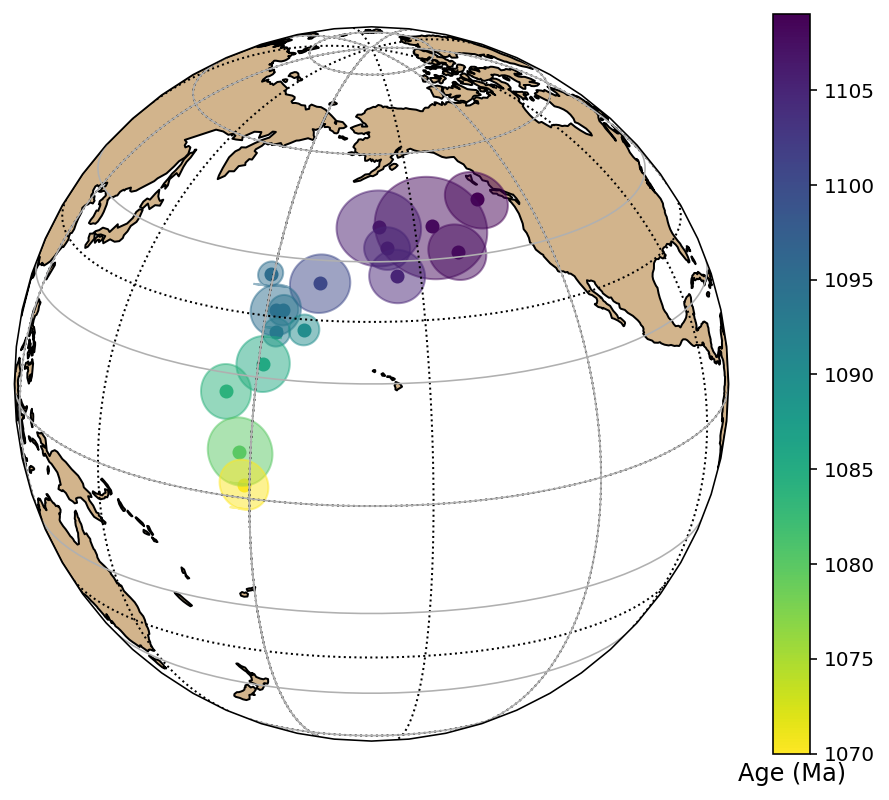

In [6]:
ax = plot_paleomagnetic_poles(Kewee_poles, 'PLon', 'PLat', 'A95', 'AgeNominal', central_longitude=200, central_latitude=20)

## tpw inversion

starting pole age is:  1109.0
starting pole lon/lat: [227.0, 49.5] starting pole k:  697.7572089711642
pole 0 age:  1109.0
pole 1 age:  1108.0
pole 2 age:  1108.0
pole 3 age:  1106.0
pole 4 age:  1105.15
pole 5 age:  1105.0
pole 6 age:  1100.36
pole 7 age:  1095.01
pole 8 age:  1095.0
pole 9 age:  1094.0
pole 10 age:  1092.51
pole 11 age:  1090.0
pole 12 age:  1085.47
pole 13 age:  1083.95
pole 14 age:  1080.0
pole 15 age:  1070.0


Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [t15]
>Metropolis: [t14]
>Metropolis: [t13]
>Metropolis: [t12]
>Metropolis: [t11]
>Metropolis: [t10]
>Metropolis: [t9]
>Metropolis: [t8]
>Metropolis: [t7]
>Metropolis: [t6]
>Metropolis: [t5]
>Metropolis: [t4]
>Metropolis: [t3]
>Metropolis: [t2]
>Metropolis: [t1]
>Metropolis: [t0]
>Metropolis: [tpw_rate]
>Metropolis: [tpw_angle]
>Metropolis: [start_pole]
>Metropolis: [start_pole_age]


Sampling 1 chain for 1_000 tune and 1_000 draw iterations (1_000 + 1_000 draws total) took 246 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


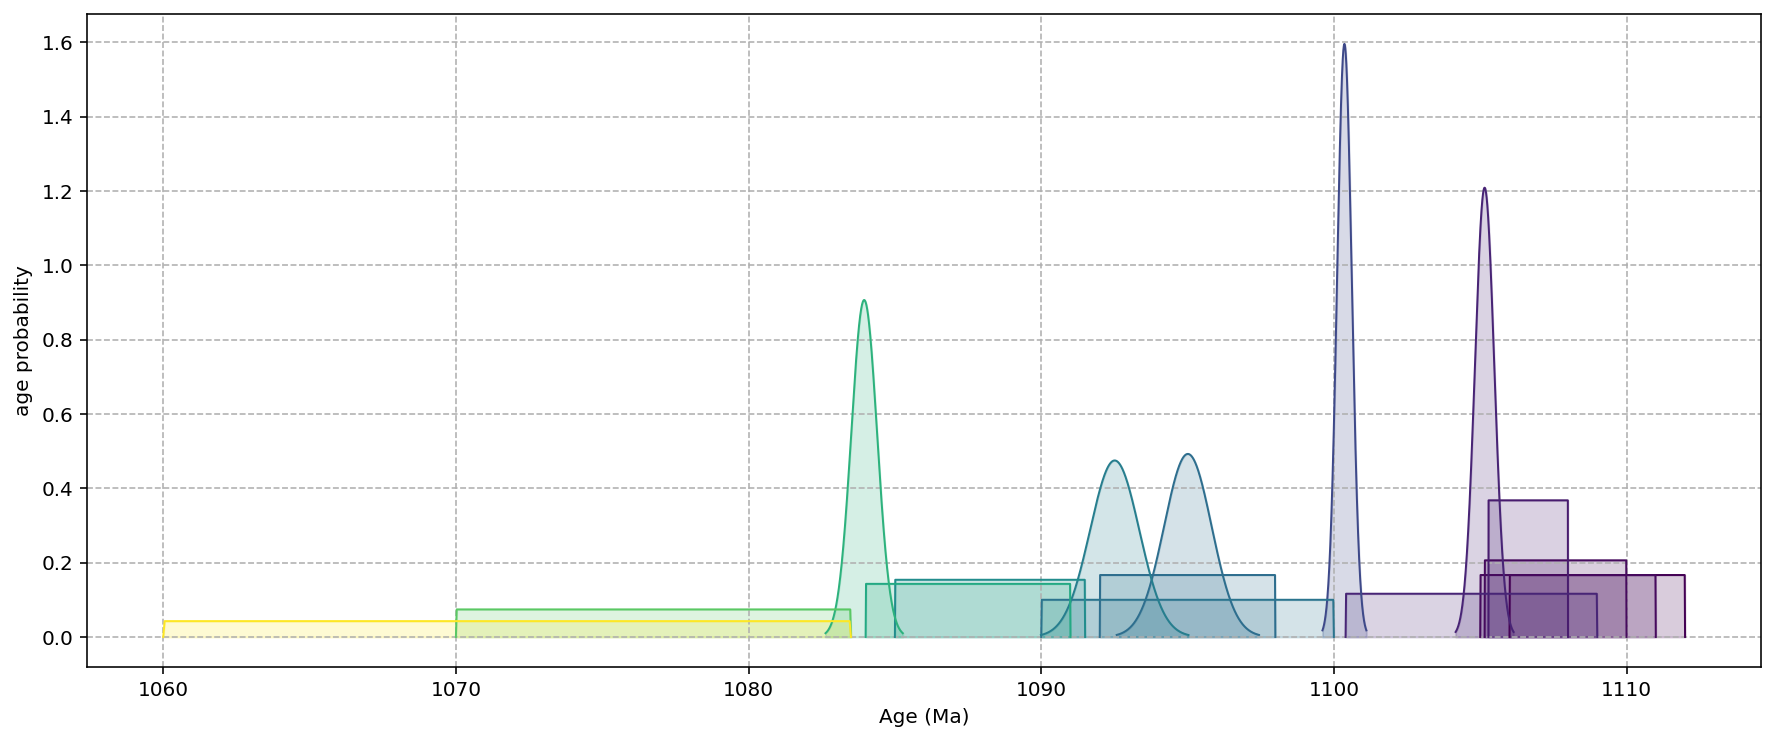

In [48]:
with pm.Model() as model:
    
    start_index = Kewee_poles['AgeNominal'].argmax()
    
    start_age = pm.Normal('start_pole_age', Kewee_poles['AgeNominal'].max(), 0.1)
    print('starting pole age is: ', str(Kewee_poles['AgeNominal'].max()))
    
    
    start_lon_lat = [Kewee_poles['PLon'].tolist()[start_index], Kewee_poles['PLat'].tolist()[start_index]]
    start_k = kappa_from_two_sigma(Kewee_poles['A95'].tolist()[start_index])
    
    start = VMF('start_pole', lon_lat=start_lon_lat, 
                k = start_k, testval = np.array(start_lon_lat), shape = 2)
    
    print('starting pole lon/lat:', start_lon_lat, 'starting pole k: ',start_k)
    
    tpw_angle = pm.Uniform('tpw_angle', 0., 360.) 
    tpw_rate = pm.Exponential('tpw_rate', 2.5) 
    
    plt.figure(figsize = (15, 6))
    plt.ylabel('age probability')
    plt.xlabel('Age (Ma)')
    for i in range(Kewee_poles.shape[0]):
        
        max_y = 0
        if Kewee_poles['GaussianOrUniform'][i] == 'uniform':
            age = pm.Uniform('t'+str(i), Kewee_poles['AgeLower'][i], Kewee_poles['AgeUpper'][i])
            x = np.linspace(Kewee_poles['AgeLower'][i], Kewee_poles['AgeUpper'][i], 500)
            y = np.zeros(500)
            y[(x< Kewee_poles['AgeUpper'][i]) & (x>Kewee_poles['AgeLower'][i])] = 1.0/(Kewee_poles['AgeUpper'][i]-Kewee_poles['AgeLower'][i])

            if max_y < max(y):
                max_y = max(y)
            
        else: 
            age = pm.Normal('t'+str(i), mu=Kewee_poles['AgeNominal'][i], sigma = Kewee_poles['Gaussian_2sigma'][i])
            mu = Kewee_poles['AgeNominal'][i]
            sigma = Kewee_poles['Gaussian_2sigma'][i]

            x = np.linspace(mu-3*sigma,mu+3*sigma, 1000)
            y = st.norm.pdf(x, mu, sigma)
            if max_y < max(y):
                max_y = max(y)
        plt.plot(x, y, color = Kewee_poles['color'][i], lw=1)
        plt.fill_between(x, y, color = Kewee_poles['color'][i], alpha = 0.2)
        plt.grid(1, ls='--')
        print('pole '+str(i)+' age: ',Kewee_poles['AgeNominal'][i])
        
        lon_lat = pole_position_tpw(start, tpw_angle, tpw_rate, start_age, age)

        observed_pole = VMF('p'+str(i), lon_lat, k = kappa_from_two_sigma(Kewee_poles['A95'].tolist()[i]), 
                            observed=[Kewee_poles['PLon'].tolist()[i], Kewee_poles['PLat'].tolist()[i]])
        
        
    trace_tpw = pm.sample(1000, step = pm.Metropolis(), compute_convergence_checks=1, chains =1, cores=1, init='auto')

In [49]:
pm.save_trace(trace_tpw, 'code_output/kewee_tpw_trace', overwrite=1)

'code_output/kewee_tpw_trace'

In [50]:
trace_tpw_saved = pm.load_trace('code_output/kewee_tpw_trace', model)

Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.


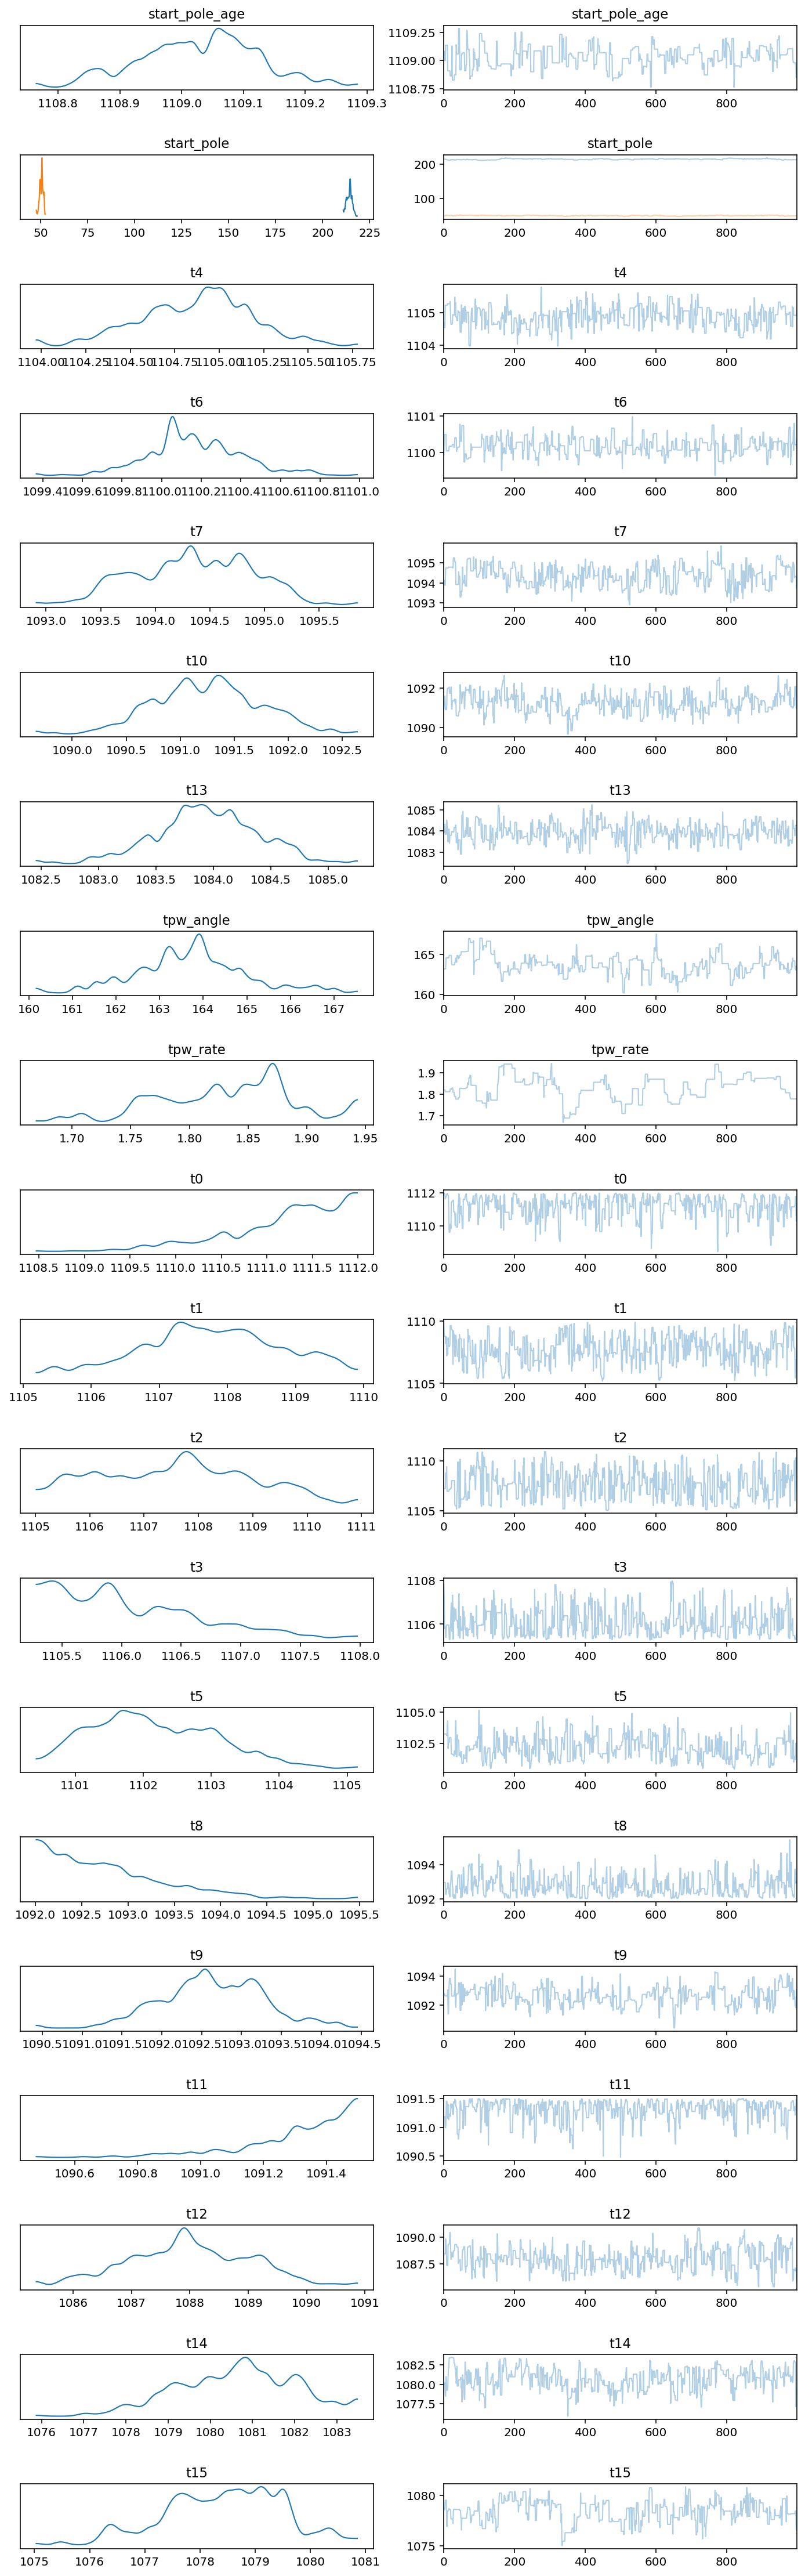

In [51]:
# plt.figure(figsize=(10, 20))
axes = pm.traceplot(trace_tpw_saved, compact=1)
plt.subplots_adjust(hspace = 1 )
# plt.savefig('code_output/kewee_1_euler_inversion_traceplot.pdf', bbox_inches='tight')

In [17]:
def plot_trace_tpw(trace, lon_lats, A95s, ages, central_lon = 30., central_lat = 30., num_paths_to_plot = 200, 
                  savefig = False, figname = 'code_output/tpw_inversion_.pdf', path_resolution=16, **kwargs):
    def pole_position(start, tpw_angle, tpw_rate, start_age, age):

        start_pole = PaleomagneticPole(start[0], start[1], age=start_age)

        # make a TPW pole
        test_1 = np.array([0.,0.,1.])
        test_2 = np.array([1.,0.,0.])
        if np.dot(start_pole._pole, test_1) > np.dot(start_pole._pole, test_2):
            great_circle_pole = np.cross(start_pole._pole, test_2)
        else:
            great_circle_pole = np.cross(start_pole._pole, test_1)
        lon, lat, _ = cartesian_to_spherical(great_circle_pole)

        TPW = EulerPole(lon[0], lat[0], tpw_rate)
        TPW.rotate(start_pole, tpw_angle)
#         print(start_age-age)
        start_pole.rotate(TPW, TPW.rate*(start_age-age))
        lon_lat = np.ndarray.flatten(np.array([start_pole.longitude, start_pole.latitude]))

        return lon_lat
    
    tpw_angle = trace.tpw_angle
    tpw_rate = trace.tpw_rate
    
    start_age = trace.start_pole_age
    start_directions = trace.start_pole

    interval = max(1, int(len(trace.start_pole_age[:]) / num_paths_to_plot))

    ax = ipmag.make_orthographic_map(central_lon, central_lat, add_land=0, grid_lines = 1)
                
    age_list = np.linspace(max(ages), min(ages), path_resolution)
    pathlats = np.zeros(path_resolution)
    pathlons = np.zeros(path_resolution)
    
    tpw_directions = np.empty_like(trace.start_pole[:])
    index=0
    for start, tpw_a , tpw_r in zip(start_directions, tpw_angle, tpw_rate):
        test_1 = np.array([0.,0.,1.])
        test_2 = np.array([1.,0.,0.])
        start_pole = PaleomagneticPole(start[0], start[1], 1.0)
        if np.dot(start_pole._pole, test_1) > np.dot(start_pole._pole, test_2):
            great_circle_pole = np.cross(start_pole._pole, test_2)
        else:
            great_circle_pole = np.cross(start_pole._pole, test_1)
        lon, lat, _ = cartesian_to_spherical(great_circle_pole)
        TPW = EulerPole(lon[0], lat[0], tpw_r)
        TPW.rotate(start_pole, tpw_a)
        tpw_directions[index, :] = np.ndarray.flatten(np.array([TPW.longitude, TPW.latitude]))
        index += 1

    plot_distributions(ax, tpw_directions[:,0], tpw_directions[:,1], cmap='Reds')
    
    for start, tpw_a, tpw_r, start_a in zip(start_directions[::interval],  
                                            tpw_angle[::interval], tpw_rate[::interval], 
                                            start_age[::interval]):
            
        for i,a in enumerate(age_list):
            lon_lat = pole_position( start, tpw_a, tpw_r, start_a, a)
            pathlons[i] = lon_lat[0]
            pathlats[i] = lon_lat[1]

        ax.plot(pathlons,pathlats,color='b', transform=ccrs.Geodetic(), alpha=0.05)
        
        
    # plot paleomagnetic observation poles here
    cNorm  = matplotlib.colors.Normalize(vmin=min(ages), vmax=max(ages))
    scalarMap = matplotlib.cm.ScalarMappable(norm=cNorm, cmap='viridis_r')

    pole_colors = [colors.rgb2hex(scalarMap.to_rgba(ages[i])) for i in range(len(ages))]
        
    cbar = plt.colorbar(scalarMap, shrink=0.85)
    cbar.ax.set_xlabel('Age (Ma)', fontsize=12) 
    for i in range(len(lon_lats)):
        this_pole = Pole(lon_lats[i][0], lon_lats[i][1], A95=A95s[i])
        this_pole.plot(ax, color=pole_colors[i])
    if savefig == True:
        plt.savefig(figname)
    plt.show()

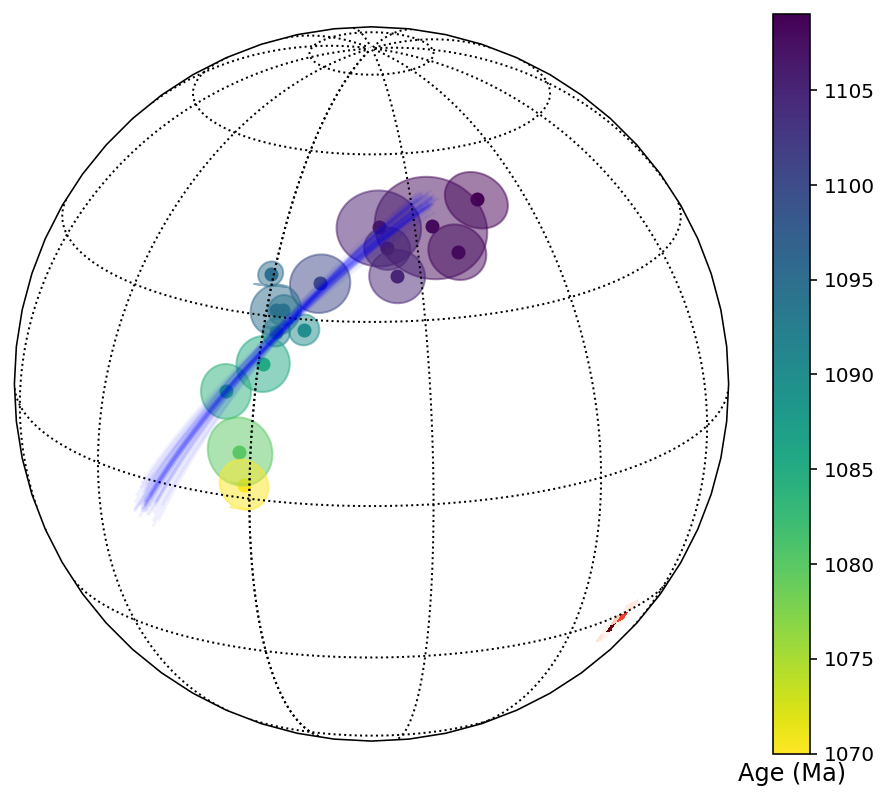

In [52]:
plot_trace_tpw(trace_tpw_saved, Kewee_poles[['PLon', 'PLat']].to_numpy(), Kewee_poles['A95'], Kewee_poles['AgeNominal'].tolist(), 200, 20, 50, 
                  savefig = 1, figname='code_output/kewee_tpw_inversion_.pdf')

## 1 euler pole inversion

starting pole age is:  1109.0
starting pole lon/lat: [227.0, 49.5] starting pole k:  697.7572089711642
pole 0 age:  1109.0
pole 1 age:  1108.0
pole 2 age:  1108.0
pole 3 age:  1106.0
pole 4 age:  1105.15
pole 5 age:  1105.0
pole 6 age:  1100.36
pole 7 age:  1095.01
pole 8 age:  1095.0
pole 9 age:  1094.0
pole 10 age:  1092.51
pole 11 age:  1090.0
pole 12 age:  1085.47
pole 13 age:  1083.95
pole 14 age:  1080.0
pole 15 age:  1070.0


Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [t15]
>Metropolis: [t14]
>Metropolis: [t13]
>Metropolis: [t12]
>Metropolis: [t11]
>Metropolis: [t10]
>Metropolis: [t9]
>Metropolis: [t8]
>Metropolis: [t7]
>Metropolis: [t6]
>Metropolis: [t5]
>Metropolis: [t4]
>Metropolis: [t3]
>Metropolis: [t2]
>Metropolis: [t1]
>Metropolis: [t0]
>Metropolis: [start_pole]
>Metropolis: [start_pole_age]
>Metropolis: [rate_1]
>Metropolis: [euler_1]


Sampling 1 chain for 1_000 tune and 2_000 draw iterations (1_000 + 2_000 draws total) took 212 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


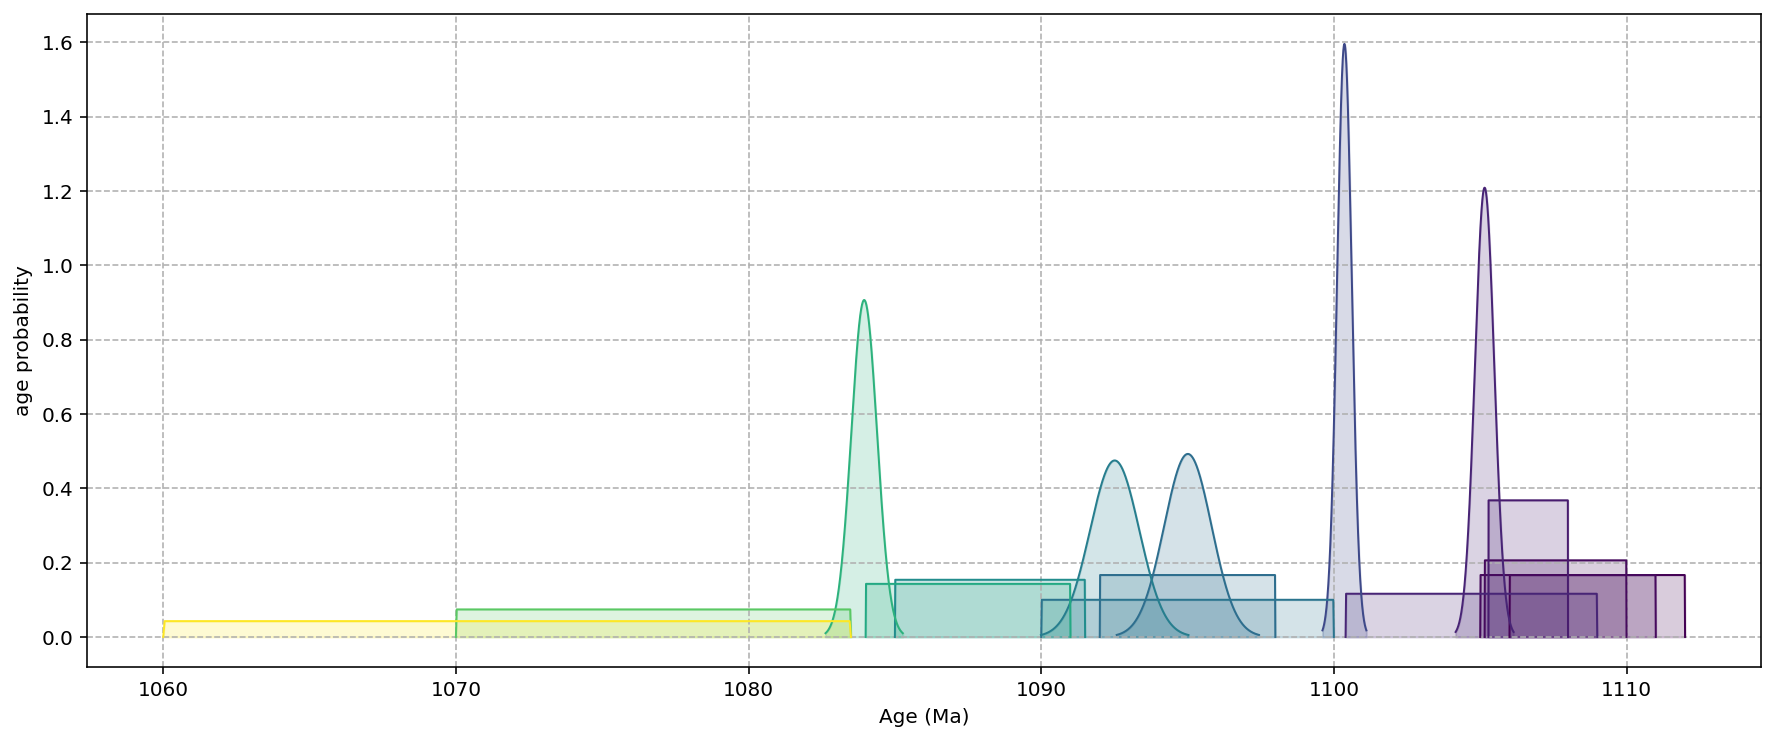

In [35]:
with pm.Model() as model:

    euler_1 = Watson_Girdle('euler_1', lon_lat = [1.,1.,], k = -.1, testval = np.array([1., 1.]), shape = 2)
    rate_1 = pm.Uniform('rate_1', 0, 4) 
    
    start_index = Kewee_poles['AgeNominal'].argmax()
    
    start_age = pm.Normal('start_pole_age', Kewee_poles['AgeNominal'].max(), 0.1)
    print('starting pole age is: ', str(Kewee_poles['AgeNominal'].max()))
    
    
    start_lon_lat = [Kewee_poles['PLon'].tolist()[start_index], Kewee_poles['PLat'].tolist()[start_index]]
    start_k = kappa_from_two_sigma(Kewee_poles['A95'].tolist()[start_index])
    
    start = VMF('start_pole', lon_lat=start_lon_lat, 
                k = start_k, testval = np.array([1., 1.]), shape = 2)
    
    print('starting pole lon/lat:', start_lon_lat, 'starting pole k: ',start_k)
    
    plt.figure(figsize = (15, 6))
    plt.ylabel('age probability')
    plt.xlabel('Age (Ma)')
    for i in range(Kewee_poles.shape[0]):
        
        max_y = 0
        if Kewee_poles['GaussianOrUniform'][i] == 'uniform':
            age = pm.Uniform('t'+str(i), Kewee_poles['AgeLower'][i], Kewee_poles['AgeUpper'][i])
            x = np.linspace(Kewee_poles['AgeLower'][i], Kewee_poles['AgeUpper'][i], 500)
            y = np.zeros(500)
            y[(x< Kewee_poles['AgeUpper'][i]) & (x>Kewee_poles['AgeLower'][i])] = 1.0/(Kewee_poles['AgeUpper'][i]-Kewee_poles['AgeLower'][i])

            if max_y < max(y):
                max_y = max(y)
            
        else: 
            age = pm.Normal('t'+str(i), mu=Kewee_poles['AgeNominal'][i], sigma = Kewee_poles['Gaussian_2sigma'][i])
            mu = Kewee_poles['AgeNominal'][i]
            sigma = Kewee_poles['Gaussian_2sigma'][i]

            x = np.linspace(mu-3*sigma,mu+3*sigma, 1000)
            y = st.norm.pdf(x, mu, sigma)
            if max_y < max(y):
                max_y = max(y)
        plt.plot(x, y, color = Kewee_poles['color'][i], lw=1)
        plt.fill_between(x, y, color = Kewee_poles['color'][i], alpha = 0.2)
        plt.grid(1, ls='--')
        print('pole '+str(i)+' age: ',Kewee_poles['AgeNominal'][i])
        
        lon_lat = pole_position_1e(start, euler_1, rate_1, start_age, age)

        observed_pole = VMF('p'+str(i), lon_lat, k = kappa_from_two_sigma(Kewee_poles['A95'].tolist()[i]), 
                            observed=[Kewee_poles['PLon'].tolist()[i], Kewee_poles['PLat'].tolist()[i]])
        
        
    trace_1e = pm.sample(2000, step = pm.Metropolis(), compute_convergence_checks=1, chains =1, cores=1, init='auto')

In [36]:
pm.save_trace(trace_1e, 'code_output/kewee_1_euler_trace', overwrite=1)

'code_output/kewee_1_euler_trace'

In [37]:
trace_1e_saved = pm.load_trace('code_output/kewee_1_euler_trace', model)

Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.


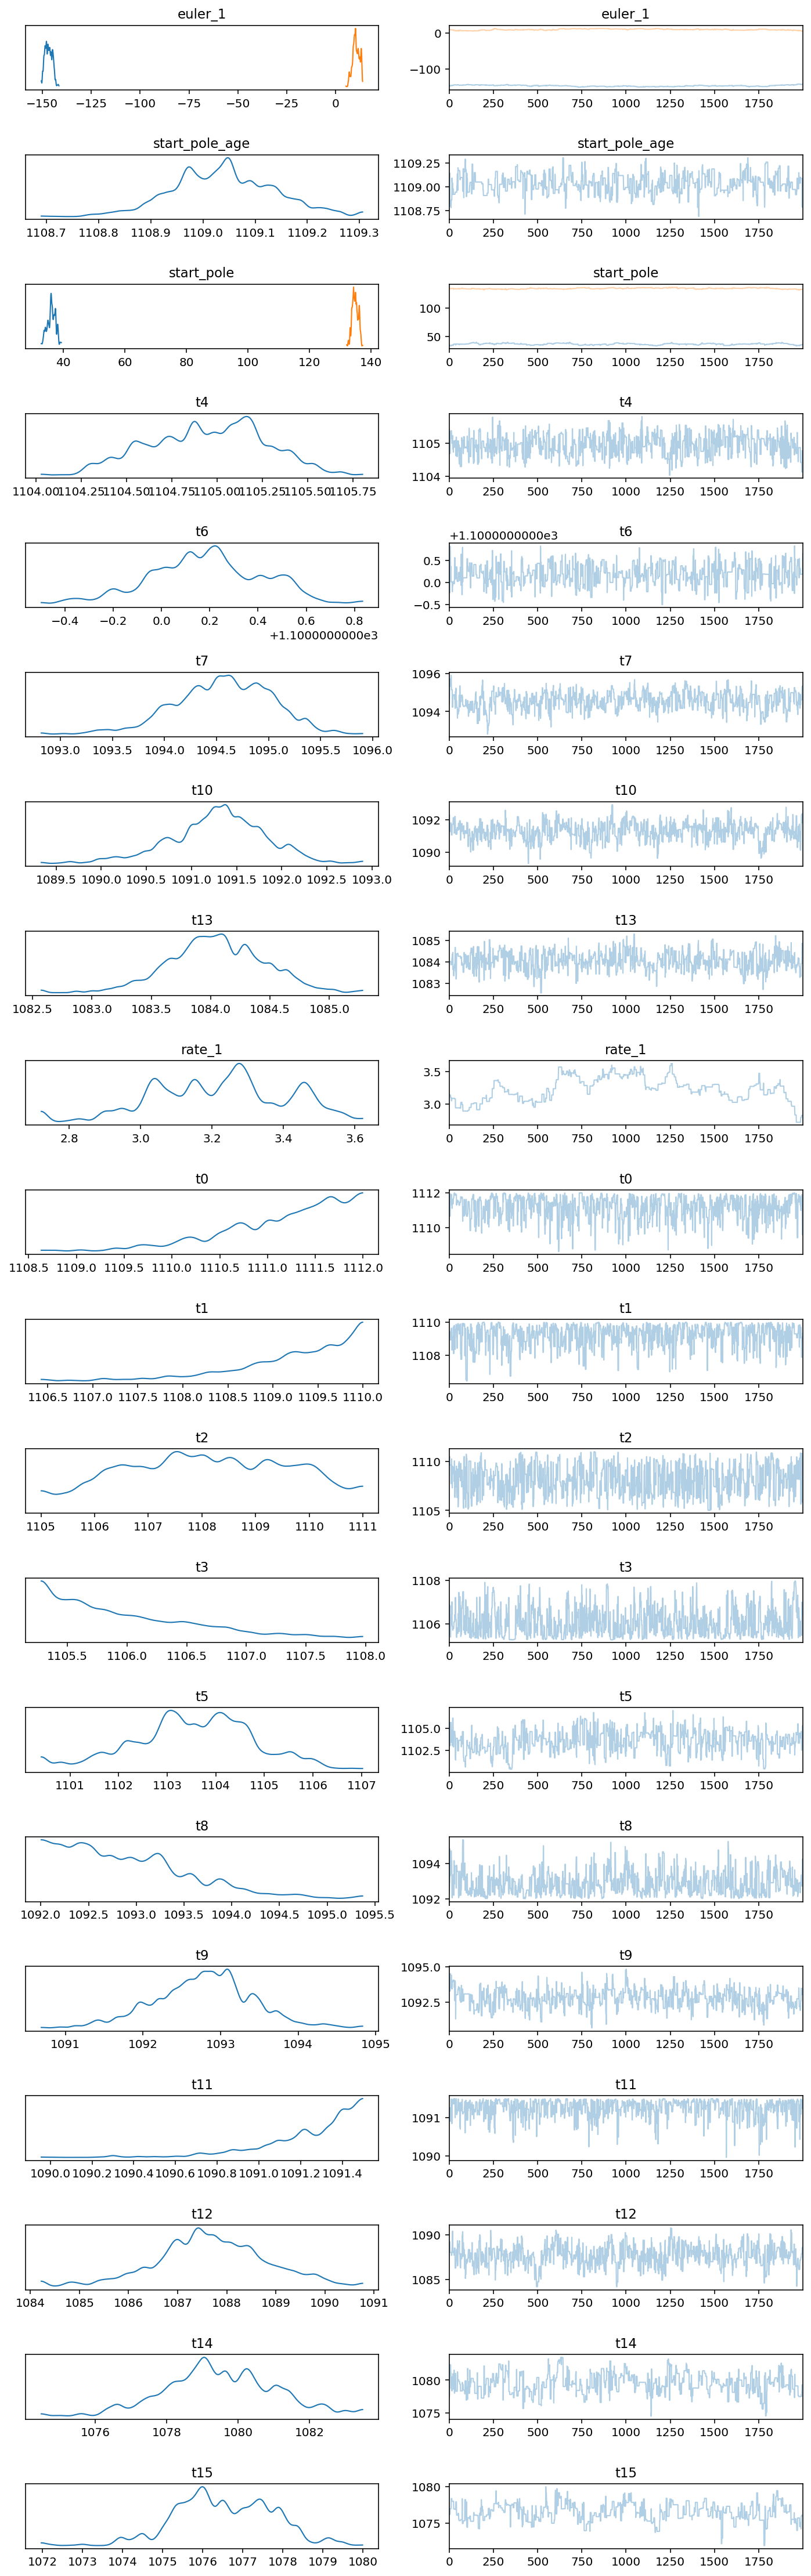

In [38]:
# plt.figure(figsize=(10, 20))
axes = pm.traceplot(trace_1e_saved, compact=1)
plt.subplots_adjust(hspace = 1 )
# plt.savefig('code_output/kewee_1_euler_inversion_traceplot.pdf', bbox_inches='tight')

<GeoAxesSubplot:>

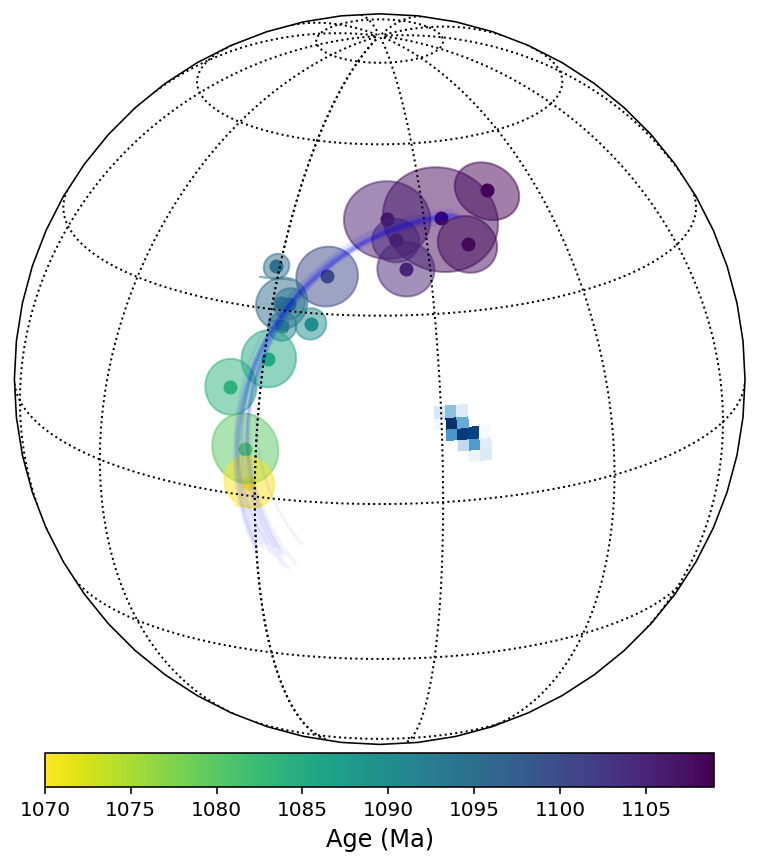

In [39]:
plot_trace_1e(trace_1e_saved, Kewee_poles[['PLon', 'PLat']].to_numpy(), Kewee_poles['A95'], Kewee_poles['AgeNominal'].tolist(), 200, 20, 100, 
                  savefig = 1, figname='code_output/kewee_1_Euler_inversion_.pdf', cmap='Blues')

## 1 euler + tpw inversion

starting pole age is:  1109.0
starting pole lon/lat: [227.0, 49.5] starting pole k:  697.7572089711642
pole 0 age:  1109.0
pole 1 age:  1108.0
pole 2 age:  1108.0
pole 3 age:  1106.0
pole 4 age:  1105.15
pole 5 age:  1105.0
pole 6 age:  1100.36
pole 7 age:  1095.01
pole 8 age:  1095.0
pole 9 age:  1094.0
pole 10 age:  1092.51
pole 11 age:  1090.0
pole 12 age:  1085.47
pole 13 age:  1083.95
pole 14 age:  1080.0
pole 15 age:  1070.0


Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [t15]
>Metropolis: [t14]
>Metropolis: [t13]
>Metropolis: [t12]
>Metropolis: [t11]
>Metropolis: [t10]
>Metropolis: [t9]
>Metropolis: [t8]
>Metropolis: [t7]
>Metropolis: [t6]
>Metropolis: [t5]
>Metropolis: [t4]
>Metropolis: [t3]
>Metropolis: [t2]
>Metropolis: [t1]
>Metropolis: [t0]
>Metropolis: [tpw_rate]
>Metropolis: [tpw_angle]
>Metropolis: [start_pole]
>Metropolis: [start_pole_age]
>Metropolis: [rate_1]
>Metropolis: [euler_1]


Sampling 1 chain for 1_000 tune and 4_000 draw iterations (1_000 + 4_000 draws total) took 778 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


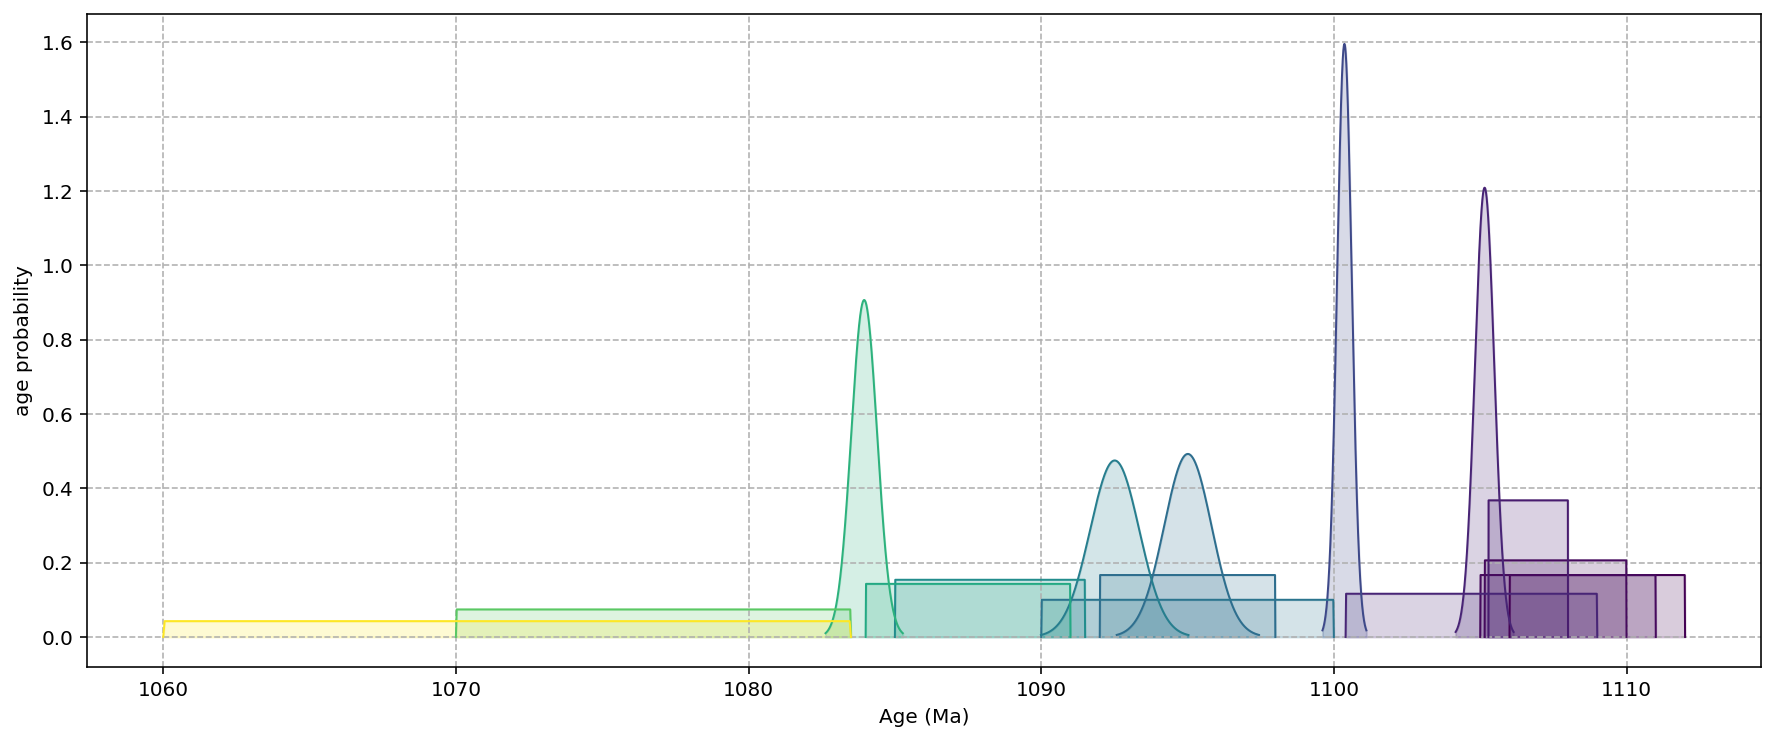

In [53]:
with pm.Model() as model:

    euler_1 = Watson_Girdle('euler_1', lon_lat = [1.,1.,], k = -1., testval = np.array([1., 1.]), shape = 2)
    rate_1 = pm.Uniform('rate_1', 0, 4) 
    
    start_index = Kewee_poles['AgeNominal'].argmax()
    
    start_age = pm.Normal('start_pole_age', Kewee_poles['AgeNominal'].max(), 0.1)
    print('starting pole age is: ', str(Kewee_poles['AgeNominal'].max()))
    
    start_lon_lat = [Kewee_poles['PLon'].tolist()[start_index], Kewee_poles['PLat'].tolist()[start_index]]
    start_k = kappa_from_two_sigma(Kewee_poles['A95'].tolist()[start_index])
    
    start = VMF('start_pole', lon_lat=start_lon_lat, 
                k = start_k, testval = np.array(start_lon_lat), shape = 2)
    
    print('starting pole lon/lat:', start_lon_lat, 'starting pole k: ',start_k)
    
    tpw_angle = pm.Uniform('tpw_angle', 0., 360.)
    tpw_rate = pm.Exponential('tpw_rate', 2.5)
    
    
    plt.figure(figsize = (15, 6))
    plt.ylabel('age probability')
    plt.xlabel('Age (Ma)')
    for i in range(Kewee_poles.shape[0]):
        
        max_y = 0
        if Kewee_poles['GaussianOrUniform'][i] == 'uniform':
            age = pm.Uniform('t'+str(i), Kewee_poles['AgeLower'][i], Kewee_poles['AgeUpper'][i])
            x = np.linspace(Kewee_poles['AgeLower'][i], Kewee_poles['AgeUpper'][i], 500)
            y = np.zeros(500)
            y[(x< Kewee_poles['AgeUpper'][i]) & (x>Kewee_poles['AgeLower'][i])] = 1.0/(Kewee_poles['AgeUpper'][i]-Kewee_poles['AgeLower'][i])

            if max_y < max(y):
                max_y = max(y)
            
        else: 
            age = pm.Normal('t'+str(i), mu=Kewee_poles['AgeNominal'][i], sigma = Kewee_poles['Gaussian_2sigma'][i])
            mu = Kewee_poles['AgeNominal'][i]
            sigma = Kewee_poles['Gaussian_2sigma'][i]

            x = np.linspace(mu-3*sigma,mu+3*sigma, 1000)
            y = st.norm.pdf(x, mu, sigma)
            if max_y < max(y):
                max_y = max(y)
        plt.plot(x, y, color = Kewee_poles['color'][i], lw=1)
        plt.fill_between(x, y, color = Kewee_poles['color'][i], alpha = 0.2)
        plt.grid(1, ls='--')
        print('pole '+str(i)+' age: ',Kewee_poles['AgeNominal'][i])
        
        lon_lat = pole_position_1e_tpw(start, euler_1, rate_1, tpw_angle, tpw_rate, start_age, age)

        observed_pole = VMF('p'+str(i), lon_lat, k = kappa_from_two_sigma(Kewee_poles['A95'].tolist()[i]), 
                            observed=[Kewee_poles['PLon'].tolist()[i], Kewee_poles['PLat'].tolist()[i]])
        
        
    trace_1e_tpw = pm.sample(4000, step = pm.Metropolis(), compute_convergence_checks=1, chains =1, cores=1, init='auto')

In [54]:
pm.save_trace(trace_1e_tpw, 'code_output/kewee_1_euler_tpw_trace', overwrite=1)

'code_output/kewee_1_euler_tpw_trace'

In [55]:
trace_1e_tpw_saved = pm.load_trace('code_output/kewee_1_euler_tpw_trace', model)

Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.


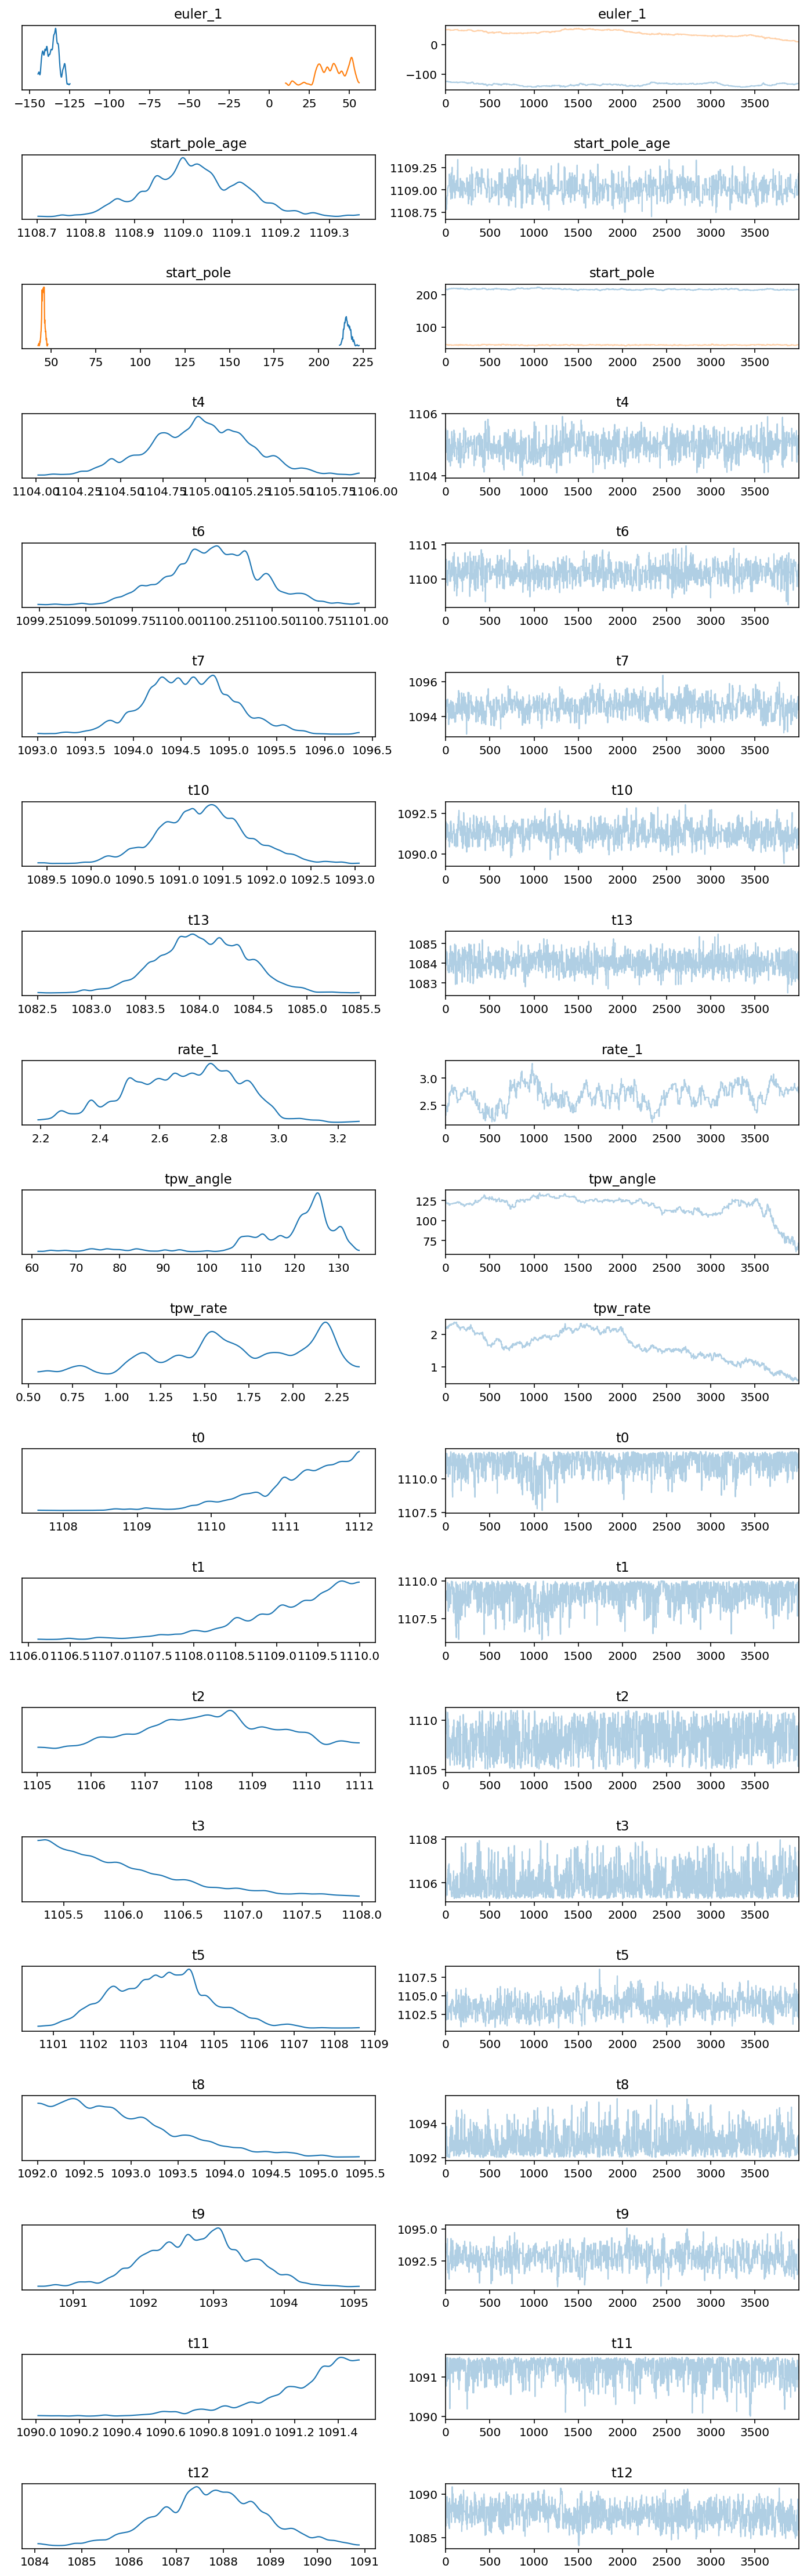

In [56]:
# plt.figure(figsize=(10, 20))
axes = pm.traceplot(trace_1e_tpw_saved, compact=1)
plt.subplots_adjust(hspace = 1 )
# plt.savefig('code_output/kewee_1_euler_inversion_traceplot.pdf', bbox_inches='tight')

In [21]:
def plot_trace_1e_tpw(trace, lon_lats, A95s, ages, central_lon = 30., central_lat = 30., num_paths_to_plot = 200, 
                  savefig = False, figname = 'code_output/1_Euler_inversion_.pdf', **kwargs):
    def pole_position(start, euler_1, rate_1, tpw_angle, tpw_rate, start_age, age):

        start_pole = PaleomagneticPole(start[0], start[1], age=start_age)

        euler_pole_1 = EulerPole(euler_1[0], euler_1[1], rate_1)

        # make a TPW pole
        test_1 = np.array([0.,0.,1.])
        test_2 = np.array([1.,0.,0.])
        if np.dot(start_pole._pole, test_1) > np.dot(start_pole._pole, test_2):
            great_circle_pole = np.cross(start_pole._pole, test_2)
        else:
            great_circle_pole = np.cross(start_pole._pole, test_1)
        lon, lat, _ = cartesian_to_spherical(great_circle_pole)

        TPW = EulerPole(lon[0], lat[0], tpw_rate)
        TPW.rotate(start_pole, tpw_angle)

        this_euler = euler_pole_1.copy()
        this_euler.add(TPW)

        start_pole.rotate(this_euler, this_euler.rate*(start_age-age))

        lon_lat = np.ndarray.flatten(np.array([start_pole.longitude, start_pole.latitude]))

        return lon_lat
    
    euler_1_directions = trace.euler_1
    euler_rates_1 = trace.rate_1
    
    tpw_angle = trace.tpw_angle
    tpw_rate = trace.tpw_rate
    
    start_age = trace.start_pole_age
    start_directions = trace.start_pole

    interval = max([1,int(len(euler_rates_1)/num_paths_to_plot)])

    ax = ipmag.make_orthographic_map(central_lon, central_lat, add_land=0, grid_lines = 1)
    
    plot_distributions(ax, euler_1_directions[:,0], euler_1_directions[:,1], cmap='Blues')
            
    age_list = np.linspace(ages[0], ages[-1], num_paths_to_plot)
    pathlons = np.empty_like(age_list)
    pathlats = np.empty_like(age_list)
    
    tpw_directions = np.empty_like(trace.start_pole[:])
    index=0
    for start, tpw_a in zip(start_directions, tpw_angle):
        test_1 = np.array([0.,0.,1.])
        test_2 = np.array([1.,0.,0.])
        start_pole = Pole(start[0], start[1], 1.0)
        if np.dot(start_pole._pole, test_1) > np.dot(start_pole._pole, test_2):
            great_circle_pole = np.cross(start_pole._pole, test_2)
        else:
            great_circle_pole = np.cross(start_pole._pole, test_1)
        lon, lat, _ = cartesian_to_spherical(great_circle_pole)
        TPW = Pole(lon[0], lat[0], 1.0)
        TPW.rotate(start_pole, tpw_a)
        tpw_directions[index, :] = np.ndarray.flatten(np.array([TPW.longitude, TPW.latitude]))
        index += 1

    plot_distributions(ax, tpw_directions[:,0], tpw_directions[:,1], cmap='Reds')
    
    for start, e1, r1, tpw_a, tpw_r, start_a in zip(start_directions[::interval], 
                        euler_1_directions[::interval], euler_rates_1[::interval], 
                        tpw_angle[::interval], tpw_rate[::interval], start_age[::interval]):
            
        for i,a in enumerate(age_list):
            lon_lat = pole_position( start, e1, r1, tpw_a, tpw_r, start_a, a)
            pathlons[i] = lon_lat[0]
            pathlats[i] = lon_lat[1]

        ax.plot(pathlons,pathlats,color='b', transform=ccrs.Geodetic(), alpha=0.05)
        
        
    # plot paleomagnetic observation poles here
    cNorm  = matplotlib.colors.Normalize(vmin=min(ages), vmax=max(ages))
    scalarMap = matplotlib.cm.ScalarMappable(norm=cNorm, cmap='viridis_r')

    pole_colors = [colors.rgb2hex(scalarMap.to_rgba(ages[i])) for i in range(len(ages))]
        
    cbar = plt.colorbar(scalarMap, shrink=0.85)
    cbar.ax.set_xlabel('Age (Ma)', fontsize=12) 
    for i in range(len(lon_lats)):
        this_pole = Pole(lon_lats[i][0], lon_lats[i][1], A95=A95s[i])
        this_pole.plot(ax, color=pole_colors[i])
    if savefig == True:
        plt.savefig(figname)
    plt.show()

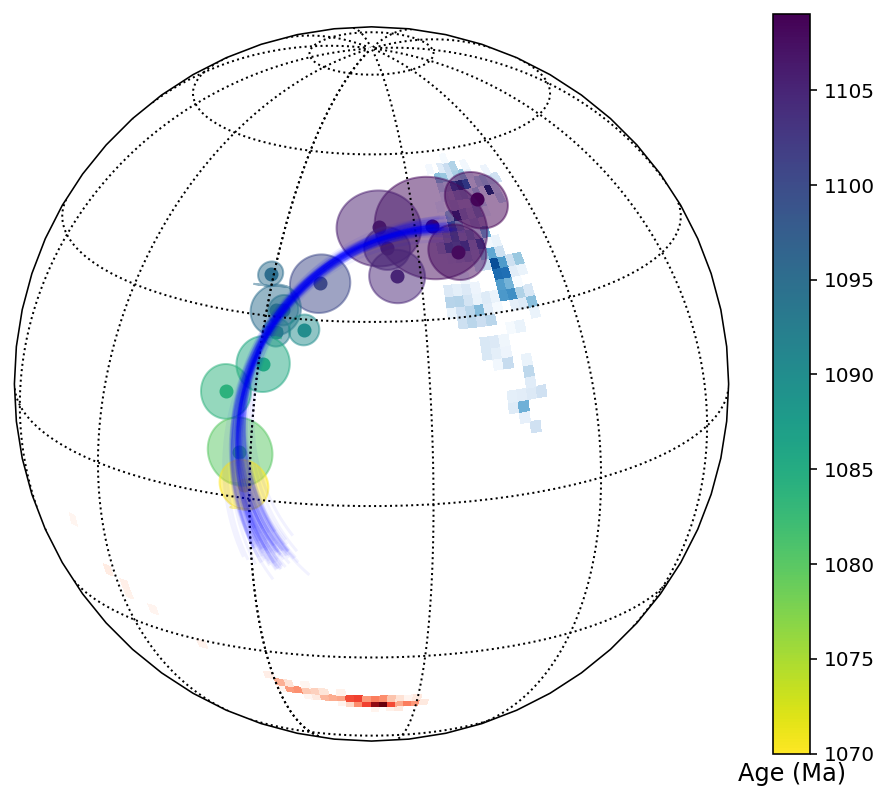

In [59]:
plot_trace_1e_tpw(trace_1e_tpw_saved, Kewee_poles[['PLon', 'PLat']].to_numpy(), Kewee_poles['A95'], Kewee_poles['AgeNominal'].tolist(), 200, 20, 100,
                  savefig = 1, figname='code_output/kewee_1_Euler_tpw_inversion_.pdf')

In [47]:
@as_op(itypes=[T.dvector, T.dvector, T.dscalar, T.dvector, T.dscalar, T.dscalar, T.dscalar, T.dscalar, T.dscalar], otypes=[T.dvector])
def pole_position_2e_tpw(start, euler_1, rate_1, euler_2, rate_2, tpw_angle, tpw_rate, start_age, age):
    
    start_pole = PaleomagneticPole(start[0], start[1], age=start_age)
    
    euler_pole_1 = EulerPole(euler_1[0], euler_1[1], rate_1)
    euler_pole_2 = EulerPole(euler_2[0], euler_2[1], rate_2)
    
    # make a TPW pole
    test_1 = np.array([0.,0.,1.])
    test_2 = np.array([1.,0.,0.])
    if np.dot(start_pole._pole, test_1) > np.dot(start_pole._pole, test_2):
        great_circle_pole = np.cross(start_pole._pole, test_2)
    else:
        great_circle_pole = np.cross(start_pole._pole, test_1)
    lon, lat, _ = cartesian_to_spherical(great_circle_pole)

    TPW = EulerPole(lon[0], lat[0], tpw_rate)
    TPW.rotate(start_pole, tpw_angle)
    
    this_euler = euler_pole_1.copy()
    this_euler.add(TPW)

    start_pole.rotate(this_euler, this_euler.rate*(start_age-age))

    lon_lat = np.ndarray.flatten(np.array([start_pole.longitude, start_pole.latitude]))

    return lon_lat


def plot_trace_1e_tpw(trace, lon_lats, A95s, ages, central_lon = 30., central_lat = 30., num_points_to_plot = 200, num_paths_to_plot = 200, 
                  savefig = False, figname = 'code_output/1_Euler_inversion_.pdf', **kwargs):
    def pole_position(start, euler_1, rate_1, tpw_angle, tpw_rate, start_age, age):

        start_pole = PaleomagneticPole(start[0], start[1], age=start_age)

        euler_pole_1 = EulerPole(euler_1[0], euler_1[1], rate_1)

        # make a TPW pole
        test_1 = np.array([0.,0.,1.])
        test_2 = np.array([1.,0.,0.])
        if np.dot(start_pole._pole, test_1) > np.dot(start_pole._pole, test_2):
            great_circle_pole = np.cross(start_pole._pole, test_2)
        else:
            great_circle_pole = np.cross(start_pole._pole, test_1)
        lon, lat, _ = cartesian_to_spherical(great_circle_pole)

        TPW = EulerPole(lon[0], lat[0], tpw_rate)
        TPW.rotate(start_pole, tpw_angle)

        this_euler = euler_pole_1.copy()
        this_euler.add(TPW)

        start_pole.rotate(this_euler, this_euler.rate*(start_age-age))

        lon_lat = np.ndarray.flatten(np.array([start_pole.longitude, start_pole.latitude]))

        return lon_lat
    
    euler_1_directions = trace.euler_1
    euler_rates_1 = trace.rate_1
    
    tpw_angle = trace.tpw_angle
    tpw_rate = trace.tpw_rate
    
    start_age = trace.start_pole_age
    start_directions = trace.start_pole

    interval = max([1,int(len(euler_rates_1)/num_paths_to_plot)])

    ax = ipmag.make_orthographic_map(central_lon, central_lat, add_land=0, grid_lines = 1)
    
    plot_distributions(ax, euler_1_directions[:,0], euler_1_directions[:,1], cmap='Blues')
            
    age_list = np.linspace(ages[0], ages[-1], num_paths_to_plot)
    pathlons = np.empty_like(age_list)
    pathlats = np.empty_like(age_list)
    
    tpw_directions = np.empty_like(trace.start_pole[:])
    index=0
    for start, tpw_a in zip(start_directions, tpw_angle):
        test_1 = np.array([0.,0.,1.])
        test_2 = np.array([1.,0.,0.])
        start_pole = Pole(start[0], start[1], 1.0)
        if np.dot(start_pole._pole, test_1) > np.dot(start_pole._pole, test_2):
            great_circle_pole = np.cross(start_pole._pole, test_2)
        else:
            great_circle_pole = np.cross(start_pole._pole, test_1)
        lon, lat, _ = cartesian_to_spherical(great_circle_pole)
        TPW = Pole(lon[0], lat[0], 1.0)
        TPW.rotate(start_pole, tpw_a)
        tpw_directions[index, :] = np.ndarray.flatten(np.array([TPW.longitude, TPW.latitude]))
        index += 1

    plot_distributions(ax, tpw_directions[:,0], tpw_directions[:,1], cmap='Reds')
    
    for start, e1, r1, tpw_a, tpw_r, start_a in zip(start_directions[::interval], 
                        euler_1_directions[::interval], euler_rates_1[::interval], 
                        tpw_angle[::interval], tpw_rate[::interval], start_age[::interval]):
            
        for i,a in enumerate(age_list):
            lon_lat = pole_position( start, e1, r1, tpw_a, tpw_r, start_a, a)
            pathlons[i] = lon_lat[0]
            pathlats[i] = lon_lat[1]

        ax.plot(pathlons,pathlats,color='b', transform=ccrs.PlateCarree(), alpha=0.05)
        
        
    # plot paleomagnetic observation poles here
    cNorm  = matplotlib.colors.Normalize(vmin=min(ages), vmax=max(ages))
    scalarMap = matplotlib.cm.ScalarMappable(norm=cNorm, cmap='viridis_r')

    pole_colors = [colors.rgb2hex(scalarMap.to_rgba(ages[i])) for i in range(len(ages))]
        
    cbar = plt.colorbar(scalarMap, shrink=0.85)
    cbar.ax.set_xlabel('Age (Ma)', fontsize=12) 
    for i in range(len(lon_lats)):
        this_pole = Pole(lon_lats[i][0], lon_lats[i][1], A95=A95s[i])
        this_pole.plot(ax, color=pole_colors[i])
    if savefig == True:
        plt.savefig(figname)
    plt.show()